In [234]:
# import necessary packages
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.constants import * 
from matplotlib.patches import Circle
from scipy.integrate import quad,dblquad
from ipywidgets import interactive
from scipy.special import fresnel 
from mpl_toolkits.mplot3d import axes3d

# **1. np.where(): How to deal with singular points?**

Plot $$sinc(x)=\frac{sin(\pi x)}{\pi x}$$ Explicitly handle the case where x=0. 

In [252]:
def sinc(x):
  arg=np.pi*np.where(x==0,1e-15,x)
  # arg=np.pi*x
  y=np.sin(arg)/arg
  return y

In [254]:
def interactive_plot(a=11):
  x=np.linspace(-5,5,a)
  y=sinc(x)
  plt.plot(x,y)

interactive(interactive_plot,a=(11,101,10))


interactive(children=(IntSlider(value=11, description='a', max=101, min=11, step=10), Output()), _dom_classes=…

You can see that there was no divide by zero error. 

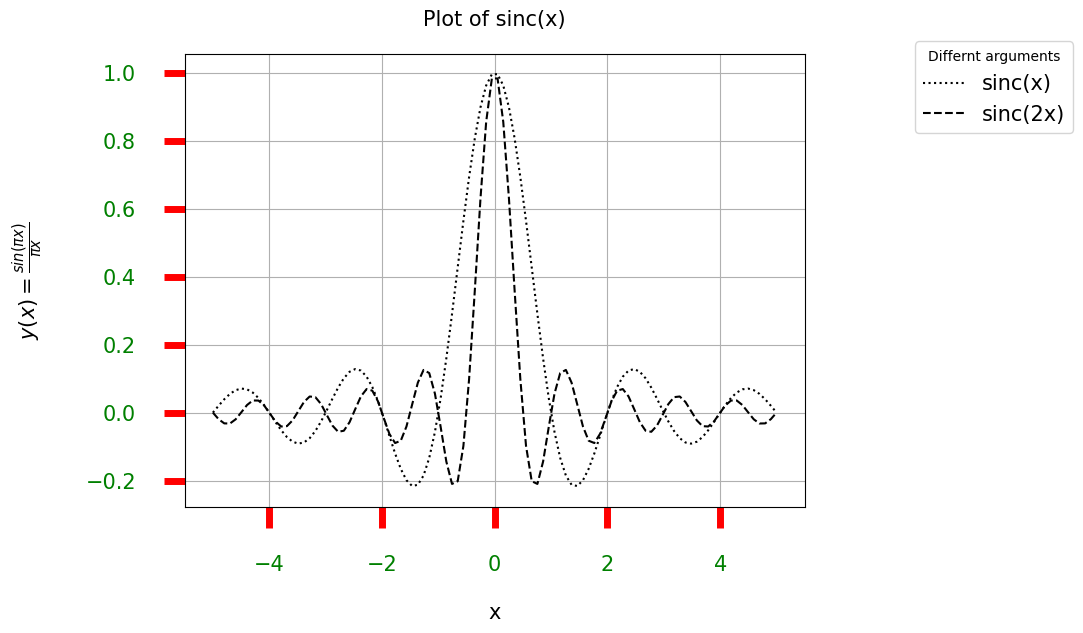

In [ ]:
fig,ax=plt.subplots(figsize=(8,6),dpi=100)

ax.plot(x,sinc(x),label='sinc(x)',c='black',ls=':')
#ax.plot(x,sinc(x),label='sinc(x)',marker='^',c='black',mfc='red',mew=3.0,mec='blue',ms=10,ls='-.')
ax.set_xlabel('x',fontsize=15,labelpad=20)
ax.set_ylabel('$y(x)=\\frac{sin(\pi x)}{\pi x}$',fontsize=15,labelpad=30)
# ax.set_title('Plot of sinc(x)',fontsize=15)

ax.plot(x,sinc(2*x),label='sinc(2x)',c='black',ls='--')
#ax.plot(x,sinc(2*x),label='sinc(2x)',marker='v',c='black')
# ax.set_xlabel('x',fontsize=15)
# ax.set_ylabel('$y(x)=\\frac{sin(\pi x)}{\pi x}$',fontsize=15)
ax.set_title('Plot of sinc(x)',fontsize=15,pad=20)
# ax.legend(fontsize=15)
ax.legend(bbox_to_anchor=(1.45,1.05),loc=1,fontsize=15,title='Differnt arguments')
# ax.legend(loc=3,fontsize=15)
ax.tick_params(axis='both',size=15,pad=20,width=5,color='red',labelsize=15,labelcolor='green')
#ax.tick_params(axis='both',labelsize=15,labelcolor='blue',color='green',width=4,pad=20,size=15)
ax.grid()

Make color-blind friendly plots. Use linestyle or ls whenever you can. 

# **2. Spirals**





## **Cornu's Spiral: Use packages as much as you can**
This is created out of Fresnel integrals with usage in optics and are given by 
$$C(l)=\int\limits_{0}^{l}\cos{\left(\frac{\pi t^2}{2}\right)}dt$$ and 
$$S(l)=\int\limits_{0}^{l}\sin{\left(\frac{\pi t^2}{2}\right)}dt$$
The parametric curve $(x(l),y(l))=(C(l),S(l))$ is the Cornu's spiral. Use scipy package to plot this curve. 

In [ ]:
a=1e3
a

1000.0

Text(0, 0.5, 'y')

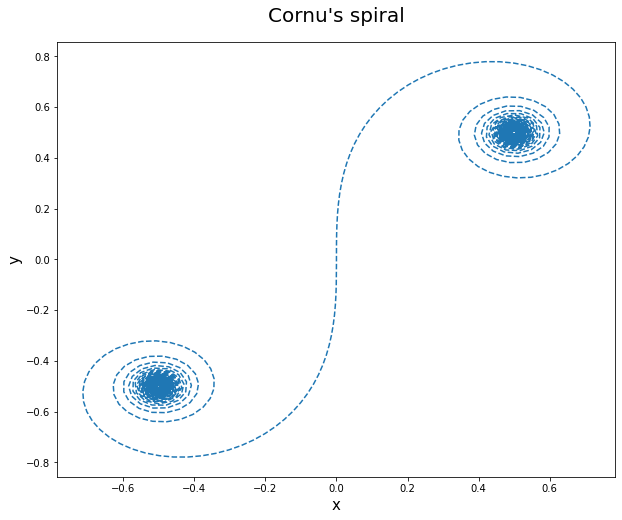

In [ ]:
l=np.linspace(-20,20,int(1e3))
plt.figure(figsize=(10,8))
C,S=fresnel(l)
plt.plot(C,S,ls='--')
plt.title("Cornu's spiral",fontsize=20,pad=20)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)

**H1**: Prove that the angular acceleration on this curve is constant. 

**References**: <br />
1. CURVES: https://faculty.sites.iastate.edu/jia/files/inline-files/curves.pdf <br />
2. CURVATURE: https://faculty.sites.iastate.edu/jia/files/inline-files/curvature.pdf <br />

Read these files in the order given.

## **Lituus Spiral: Interactive Polar Plot**

In [ ]:
theta=np.linspace(0.1,12*np.pi,100)
def radial(a):
  return a/np.sqrt(theta)

In [ ]:
def interactive_plot(a=1):
  r=a/np.sqrt(theta)
  plt.figure(figsize=(10,8))
  plt.polar(theta,r,c='red')
  plt.title('Plot of a Lituus Spiral',fontsize=20,pad=20)

interactive(interactive_plot,a=(1,10,1))


interactive(children=(IntSlider(value=1, description='a', max=10, min=1), Output()), _dom_classes=('widget-int…

**H2**: Prove that the magnetic field at the centre of the Lituus Spiral is $\frac{\mu_0I}{3a}\sqrt{2\pi}$. See Griffiths' Electrodynamics Book Question 5.51

# **3. Bowditch Curves/Lissajous Figures: Adding Subplots**

Consider two sinusoisal motions
$$y_1(t)=\sin{(t)}, y_2(t)=\sin{(nt+\phi)}$$ where n is an integer and $\phi$ is some offset. Make 4 subplots for various values of n and $\phi$, but using only one for loop. 

In [ ]:
print(np.pi/4)

0.7853981633974483


Text(0.5, 0.98, 'Lissajous Figures')

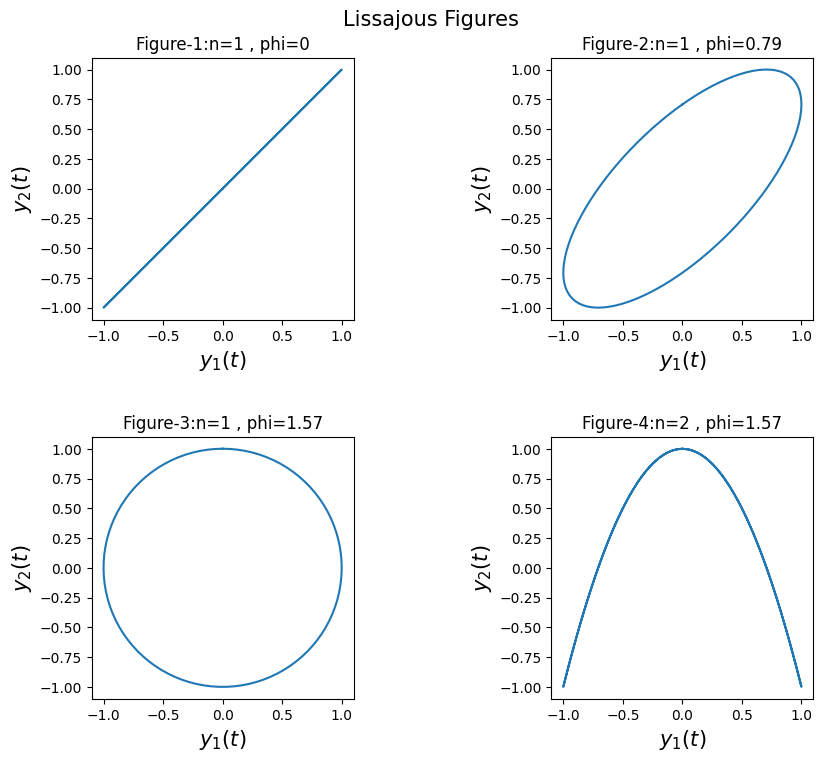

In [ ]:
t=np.linspace(0,2*np.pi,100)
n=[1,1,1,2]
phi=[0,np.pi/4,np.pi/2,np.pi/2]
fig=plt.figure(figsize=(10,8),dpi=100)

for i in range(len(n)):
  ax=fig.add_subplot(2,2,i+1)
  ax.plot(np.sin(t),np.sin(n[i]*t+phi[i]))
  ax.set_xlabel('$y_1(t)$',fontsize=15)
  ax.set_ylabel('$y_2(t)$',fontsize=15)
  ax.set_title('Figure-'+str(i+1)+':'+'n='+ str(n[i])+ ' , phi=' + str(round(phi[i],2)))
  ax.set_aspect('equal')
fig.tight_layout(pad=3.0)
plt.suptitle('Lissajous Figures',fontsize=15)

# **4. Fields in 2D**

[[-1.56605413 -1.52972443 -1.4929474  ... -1.4929474  -1.52972443
  -1.56605413]
 [-1.55152628 -1.51454332 -1.47708347 ... -1.47708347 -1.51454332
  -1.55152628]
 [-1.53754117 -1.49990528 -1.46176211 ... -1.46176211 -1.49990528
  -1.53754117]
 ...
 [-2.56143154 -2.53709413 -2.51203164 ... -2.51203164 -2.53709413
  -2.56143154]
 [-2.56913043 -2.54515929 -2.52051088 ... -2.52051088 -2.54515929
  -2.56913043]
 [-2.577501   -2.55390671 -2.52968015 ... -2.52968015 -2.55390671
  -2.577501  ]]
100


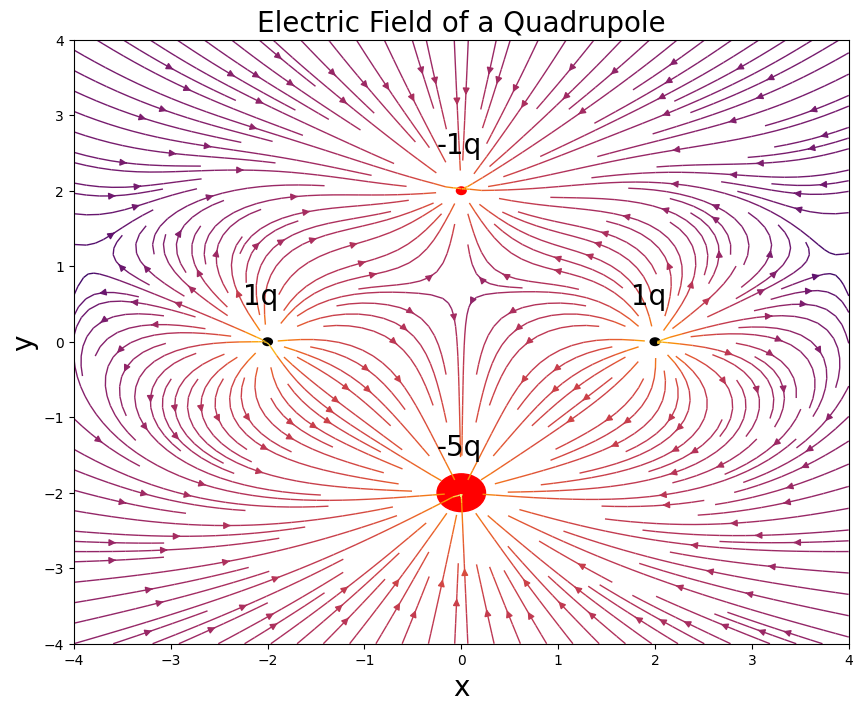

In [251]:
total=100
figure, ax = plt.subplots(figsize=(10,8),dpi=100)
x=np.linspace(-4,4,total)
y=np.linspace(-4,4,total)
X,Y=np.meshgrid(x,y)

k=1/(4*np.pi*epsilon_0)
Ex=[[0]*total]*total
Ey=deepcopy(Ex)
# create a dictionary of charges

qpos={(-2,0): 1, (2,0): 1, (0,-2): -5, (0,2): -1}

for charge_loc,charge in qpos.items():
  if(charge>0):
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='black'))
  else:
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='red'))
  ax.text(charge_loc[0]-0.25,charge_loc[1]+0.5,s=str(charge)+'q',fontsize=20)

for charge_loc,charge in qpos.items():
  charge_xloc,charge_yloc=charge_loc
  R=np.sqrt((X-charge_xloc)**2+(Y-charge_yloc)**2)
  Ex+=charge*(X-charge_xloc)/R**3
  Ey+=charge*(Y-charge_yloc)/R**3

color=np.log((np.sqrt(Ex**2+Ey**2)))
print(color)

ax.streamplot(X, Y, Ex, Ey,color=color,linewidth=1,density=2, arrowstyle='-|>', arrowsize=1,cmap='inferno')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Electric Field of a Quadrupole', fontsize=20)
print(len(color))

**References:** <br />

1. Hues, Lightness, Saturation: https://vanseodesign.com/web-design/hue-saturation-and-lightness/ <br />
2. Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

**H3**: Find out how the color scheme is working here.

**H4:** Plot the electric field lines due to an octopole distribution. Distribute the 8 charges with alternating signs on a circle. 
Do not hardcore the charge locations. Use a for loop. 

## **Electric Field due to a Parallel Plate Capacitor**

Text(0.5, 1.0, 'Electric Field of a Parallel Plate Capacitor')

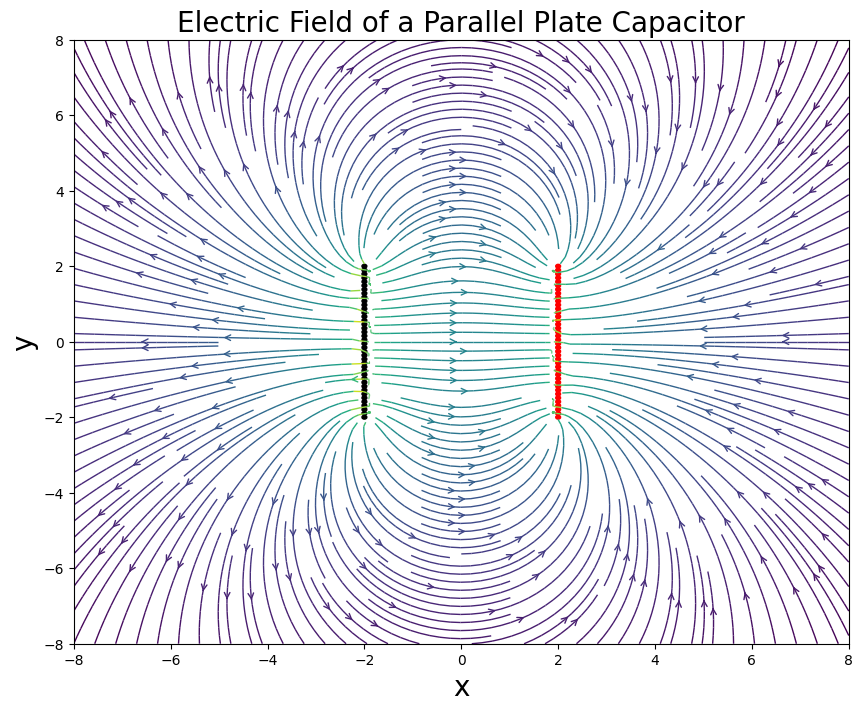

In [ ]:
qpos={}
total_num_charges=40
int_dis=1e-2
for i in range(total_num_charges):
  qpos[(-2,4*i/(total_num_charges-1)-2)]=1
  qpos[(2,4*i/(total_num_charges-1)-2)]=-1

total=100
figure, ax = plt.subplots(figsize=(10,8),dpi=100)
x=np.linspace(-8,8,total)
y=np.linspace(-8,8,total)
X,Y=np.meshgrid(x,y)

k=1/(4*np.pi*epsilon_0)
Ex=[[0]*total]*total
Ey=deepcopy(Ex)

# qpos={1: (-2,0), 5: (2,0), -1: (0,-2), -5: (0,2)}
for charge_loc,charge in qpos.items():
  if(charge>0):
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='black'))
  else:
    ax.add_artist(Circle(charge_loc,abs(charge)/20,color='red'))

for charge_loc,charge in qpos.items():
  charge_xloc,charge_yloc=charge_loc
  R=np.sqrt((X-charge_xloc)**2+(Y-charge_yloc)**2)
  Ex+=charge*(X-charge_xloc)/R**3
  Ey+=charge*(Y-charge_yloc)/R**3
  
color=np.log((np.sqrt(Ex**2+Ey**2)))

ax.streamplot(X, Y, Ex, Ey, color=color,linewidth=1,cmap=plt.cm.viridis,density=2.5, arrowstyle='->', arrowsize=1)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Electric Field of a Parallel Plate Capacitor', fontsize=20)


# **5. Fields in 3D**

Numerically integrate $$I=\int\limits_{-\infty}^{\infty}e^{-ax^2}dx$$
Pass a as an argument. The analytical value of I is 
$$I=\sqrt{\frac{\pi}{a}}$$ Verify your numerical result against various values of a.

In [ ]:
def integrate(x,a):
  return np.exp(-a*x**2)

In [ ]:
a=2
ans=quad(integrate,-np.inf,np.inf,args=(a))[0]
print(ans,np.sqrt(np.pi/a))
#help(quad)

1.2533141373155017 1.2533141373155001


Let's now perform a double integral. We use dblquad. It returns the double (definite) integral of func(y, x) from x = a..b and y = gfun(x)..hfun(x). Perform the integration 
$$I=\int\limits_{0}^{1}\int\limits_{y=0}^{y=x}ay\hspace{2pt}dydx$$

In [ ]:
def integrate(y,x,a):
  return a*y
a=2
ans=dblquad(integrate,0,1,lambda x:0, lambda x:x,args=[a])[0]
print(ans,a/6)


0.33333333333333337 0.3333333333333333


**Reference**: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/

## **Magnetic Field of a Cylindrical Bar Magnet**
Question: Plot the magnetic field due to a small cylindrical bar magnet with magnetization $1000 kA/m$. 

*Solution*: Consider a cylinder with its center at the origin of the coordinate system. Conside a disk of infinitesimally small thickness $dz'$. The current in this disc flows in the azimuthal direction with value $Mdz'$ since surface density $\vec{K}_{bound}=M\hat{\phi}$. The line element in the azimuthal direction (in cylindrical coordinate system ($\rho,\phi,z$)) is $\vec{dl'}=(-\rho^{'}\sin{(\phi^{'})}\hat{x}+\rho^{'}\cos{(\phi^{'})}\hat{y})d\phi^{'}$, where the primed coordinates represent the source point. Let $\vec{r}=(x,y,z)$ represent the coodinates of a field point where these coordinates can take values from $(-100,100)$ cm. Let the coordinates of the source point be $\vec{r'}=(\rho^{'}\cos{(\phi^{'})},\rho^{'}\sin{(\phi^{'})},z')$. Therefore, the magnetic field $\vec{B}$ is given by
$$\vec{B}=\frac{\mu_0M}{4\pi}\int\limits_{-z_{min}}^{z_{max}}\int\limits_{0}^{2\pi}\frac{\vec{dl'}\times(\vec{r}-\vec{r'})}{\left|\vec{r}-\vec{r'}\right|^3}dz'd\phi'$$
Using tha above formula, we can calculate the components of the magnetic field $B_x$,$B_y$ ,$B_z$. We first create a meshgrid and then using quiver plots, plot the field components. 

**H5**: Plot the magnetic field with the magnet in 3d. 

In [ ]:
cyl_rad=1
cyl_len=2

total=8
l_lim=-100
u_lim=100
x=np.linspace(l_lim,u_lim,total)
y=deepcopy(x)
z=deepcopy(x)
x,y,z=np.meshgrid(x,y,z)

# Functions to calculate the integrands in the three directions
def x_integrand(phi_prime,z_prime,x,y,z):
  R=np.linalg.norm([x-cyl_rad*np.cos(phi_prime),y-cyl_rad*np.sin(phi_prime),z-z_prime])
  return cyl_rad*np.cos(phi_prime)*(z-z_prime)/R**3

def y_integrand(phi_prime,z_prime,x,y,z):
  R=np.linalg.norm([x-cyl_rad*np.cos(phi_prime),y-cyl_rad*np.sin(phi_prime),z-z_prime])
  return cyl_rad*np.sin(phi_prime)*(z-z_prime)/R**3

def z_integrand(phi_prime,z_prime,x,y,z):
  R=np.linalg.norm([x-cyl_rad*np.cos(phi_prime),y-cyl_rad*np.sin(phi_prime),z-z_prime])
  return (cyl_rad*np.sin(phi_prime)*(y-cyl_rad*np.sin(phi_prime))+cyl_rad*np.cos(phi_prime)*(x-cyl_rad*np.cos(phi_prime)))/R**3


# Function to calculate magnetic field
def magnetic_field(x,y,z):
  M=1e6
  mu0_4pi=mu_0/(4*np.pi)
  print(mu0_4pi)
  cons=M*mu0_4pi
  x=x.reshape(-1)
  y=y.reshape(-1)
  z=z.reshape(-1)
  mag_x=[]
  mag_y=[]
  mag_z=[]


  for i in range(0,len(x)):
    mag_x.append(cons*dblquad(x_integrand,-cyl_len/2,cyl_len/2,lambda inner:0,lambda inner:2*np.pi,args=(x[i],y[i],z[i]))[0])
    mag_y.append(cons*dblquad(y_integrand,-cyl_len/2,cyl_len/2,lambda inner:0,lambda inner:2*np.pi,args=(x[i],y[i],z[i]))[0])
    mag_z.append(-cons*dblquad(z_integrand,-cyl_len/2,cyl_len/2,lambda inner:0,lambda inner:2*np.pi,args=(x[i],y[i],z[i]))[0])

  mag_x=np.array(mag_x).reshape(total,total,total)
  mag_y=np.array(mag_y).reshape(total,total,total)
  mag_z=np.array(mag_z).reshape(total,total,total)
  
  return mag_x,mag_y,mag_z

Bx,By,Bz=magnetic_field(x,y,z)

1.0000000000000001e-07


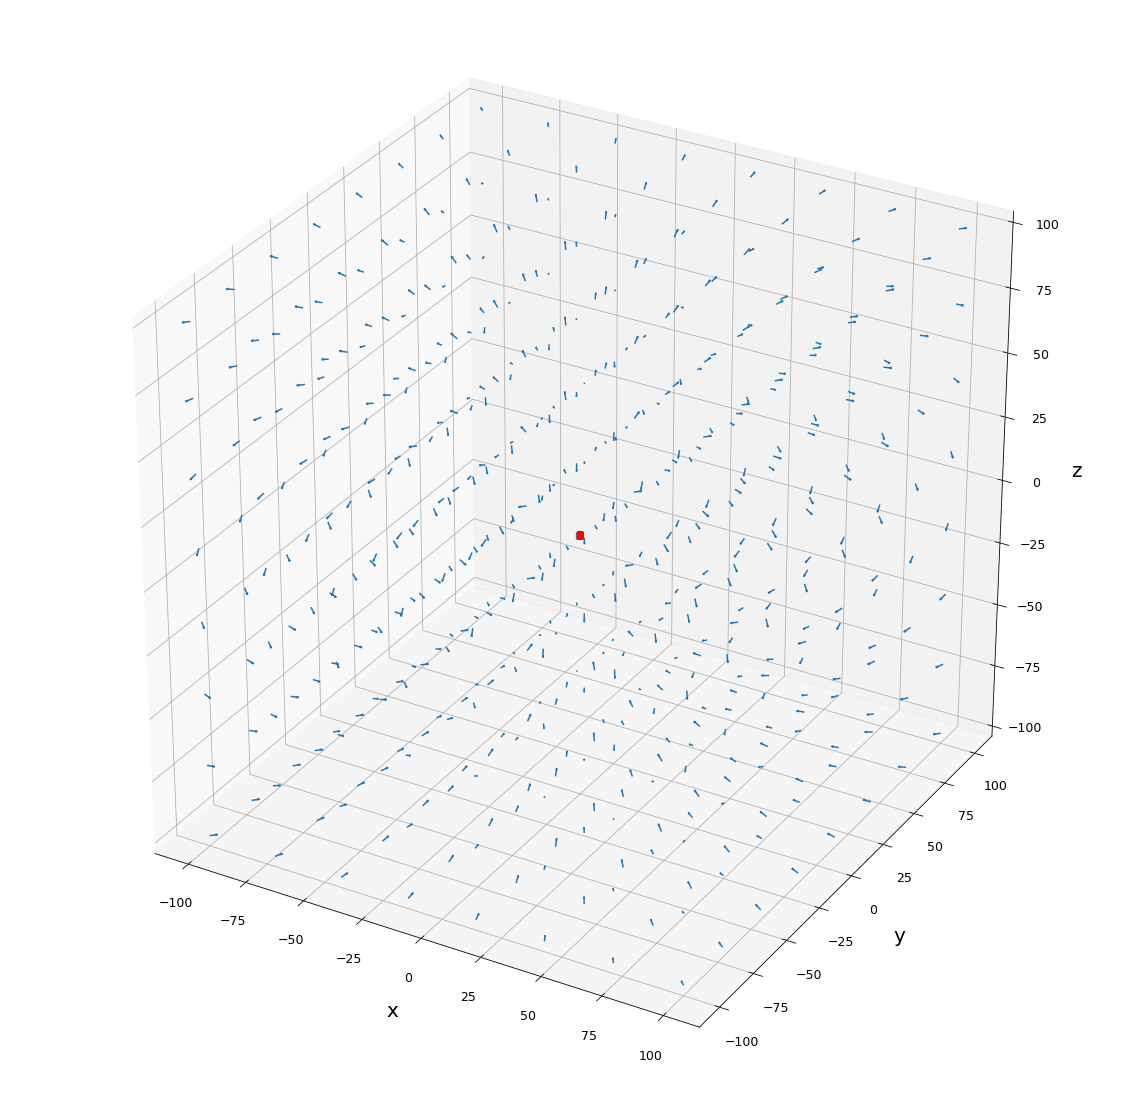

In [ ]:
def cylinder(cyl_rad):
    phi = np.linspace(0,2*np.pi,100)
    return cyl_rad*np.cos(phi),cyl_rad*np.sin(phi)

fig=plt.figure(figsize=(20,20))
ax=fig.gca(projection='3d')
c_x,c_y=cylinder(cyl_rad)
for i in np.linspace(-int(cyl_len/2),int(cyl_len/2),100):
  ax.plot(c_x,c_y,i,color='r')
ax.set_xlabel('x',fontsize=20,labelpad=30)
ax.set_ylabel('y',fontsize=20,labelpad=30)
ax.set_zlabel('z',fontsize=20,labelpad=30)
ax.tick_params(labelsize=12.5,pad=15)
color=np.linalg.norm([Bx,By,Bz])
ax.quiver(x,y,z,Bx,By,Bz,length=3,normalize=True,label='Magnetic Field of a Cylindrical Magnet')

**H5**: Figure out how numbers are mapped to colors. How are the lowest and highest numeric values allocated the extremities of the colormaps?

## **Flow Past a Sphere at Low Reynolds Numbers**

Theory: https://geo.libretexts.org/Bookshelves/Sedimentology/Book%3A_Introduction_to_Fluid_Motions_and_Sediment_Transport_(Southard)/03%3A_Flow_Past_a_Sphere_II_-_Stokes'_Law%2C_The_Bernoulli_Equation%2C_Turbulence%2C_Boundary_Layers%2C_Flow_Separation/3.02%3A_Flow_Past_a_Sphere_at_Low_Reynolds_Numbers#:~:text=1%3A%20Steady%20flow%20of%20a,flow%E2%80%9D)%20past%20a%20sphere.&text=For%20a%20large%20distance%20away,than%20the%20free%2Dstream%20velocity <br />
Check equation 3.2.1 

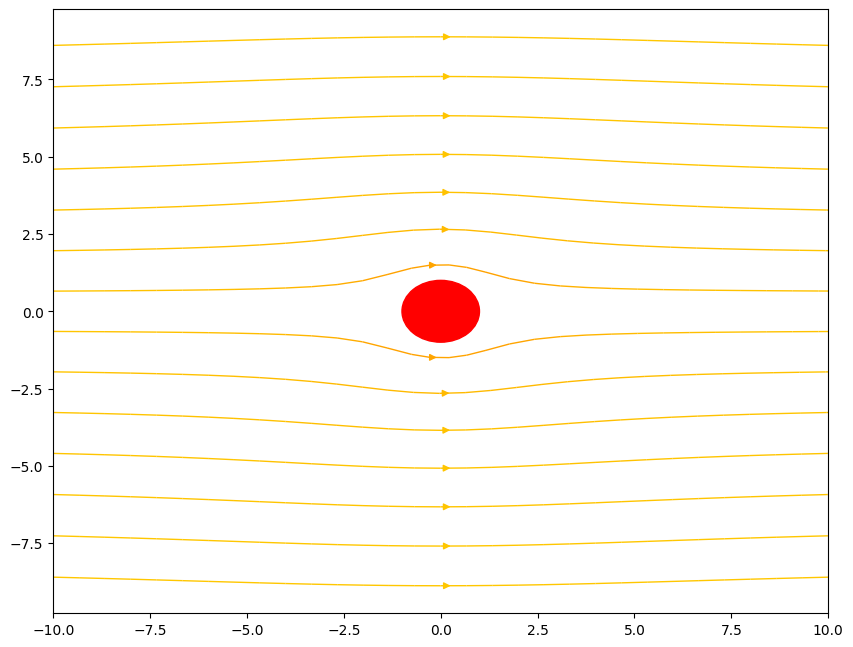

In [247]:
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
xg,yg=np.meshgrid(x,y)
rad=1
vel=1
def velocity(x,y,R,U):
  r=np.sqrt(x**2+y**2)
  cos_th=x/r
  sin_th=y/r
  u_r=U*cos_th*(1-3*R/(2*r)+R**3/(2*r**3))
  u_theta=-U*sin_th*(1-3*R/(4*r)-R**3/(4*r**3))
  u_x=u_r*cos_th-u_theta*sin_th
  u_y=u_r*sin_th+u_theta*cos_th
  return u_x,u_y

ux,uy=velocity(xg,yg,rad,vel)

color=np.log((np.sqrt(ux**2+uy**2)))
y_aux=np.linspace(-10,10,16)
x_aux=[-8]*len(y_aux)
figure, ax = plt.subplots(figsize=(10,8),dpi=100)
ax.streamplot(xg, yg, ux, uy, color=color,linewidth=1,cmap='hot',density=1, arrowstyle='-|>', arrowsize=1,minlength=0.4,start_points=np.array([x_aux,y_aux]).T)
ax.add_artist(Circle((0,0),1,color='red'))